Libraries Importing

In [22]:
import nltk
nltk.download('punkt') # Download punkt sentence tokenizer model
nltk.download('punkt_tab') # This line is for downloading punkt_tab
nltk.download('averaged_perceptron_tagger') # Download the necessary data
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('wordnet')
# Load the dataset
df = pd.read_csv('AIconference.csv')
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


                                               Title  \
0  How do we move towards true artificial intelli...   
1  A Review on Artificial Intelligence with Deep ...   
2  Construction of Enterprise Business Management...   
3  Application and existing problems of computer ...   
4  The Risks and Countermeasures of Accounting Ar...   

                                             Authors  \
0   W. Liu; G. Zhuang; X. Liu; S. Hu; R. He; Y. Wang   
1  J. Harika; P. Baleeshwar; K. Navya; H. Shanmug...   
2                                   M. Song; X. Chen   
3                                   G. Chen; Q. Yuan   
4                                    C. Zhu; Y. Guan   

                                 Author Affiliations  \
0  Artificial Intelligence School, Beijing Univer...   
1  Department of Artificial Intelligence and Data...   
2  Nanchang Vocational University, Nanchang, Chin...   
3  Yichun Vocational Technical College, Yichun, J...   
4  Jiangxi Science and Technology Normal Unive

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

  # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

df['preprocessed_text'] = df['Title'].apply(preprocess_text)
print(df['preprocessed_text'].head())

0            move towards true artificial intelligence
1    review artificial intelligence deep human reas...
2    construction enterprise business management an...
3    application existing problem computer network ...
4    risk countermeasure accounting artificial inte...
Name: preprocessed_text, dtype: object


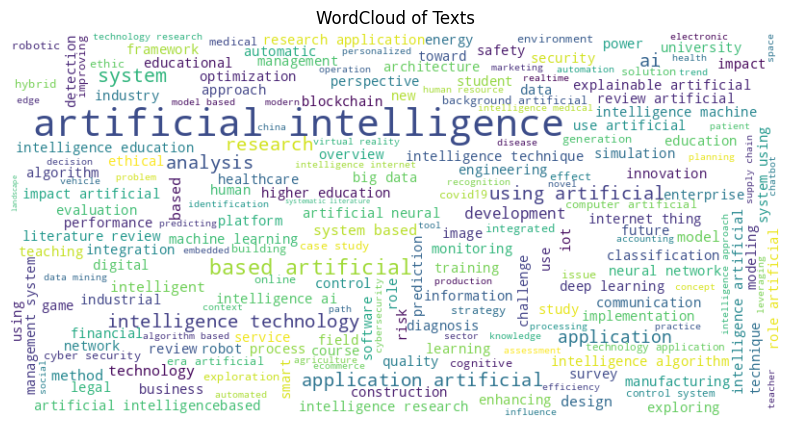

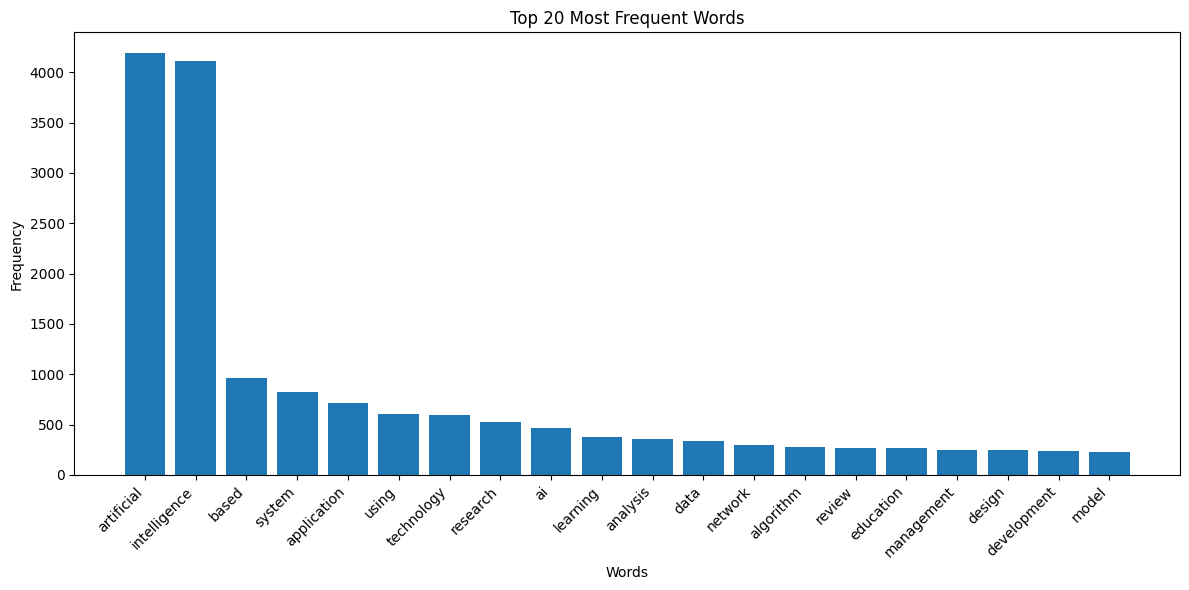

In [24]:
#word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Texts')
plt.show()

# top 20 most frequent words
all_words = ' '.join(df['preprocessed_text']).split()
word_freq = Counter(all_words)
top_20_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(12, 6))
plt.bar(top_20_words.keys(), top_20_words.values())
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [25]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (5000, 4577)


In [26]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(tfidf_matrix)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical.fit_predict(tfidf_matrix.toarray())

# Evaluate clustering results
print(f"K-Means Silhouette Score: {silhouette_score(tfidf_matrix, kmeans_clusters)}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(tfidf_matrix, hierarchical_clusters)}")


K-Means Silhouette Score: 0.004369528147520071
Hierarchical Clustering Silhouette Score: -0.0019664479306211987


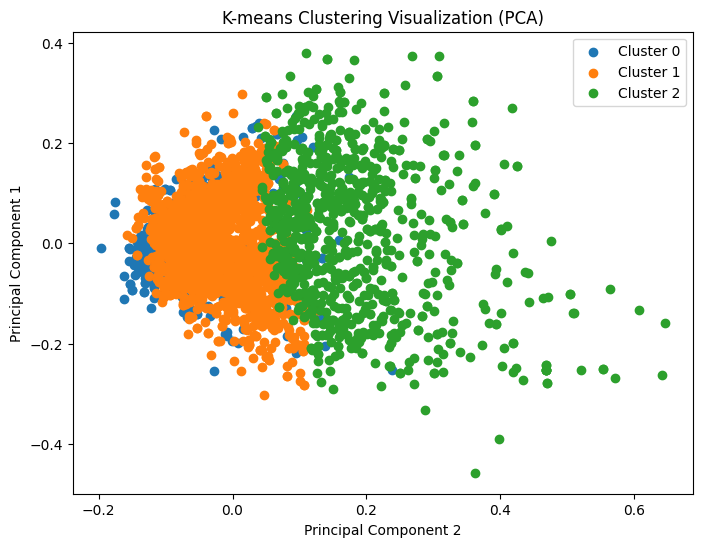

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
# 2D visualization using PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 6))
for i in range(3): # Assuming 3 clusters
    plt.scatter(reduced_features[kmeans_clusters == i, 0], reduced_features[kmeans_clusters == i, 1], label=f'Cluster {i}')
plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

In [30]:
# LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(tfidf_matrix)

# NMF
nmf_model = NMF(n_components=5, random_state=42)
nmf_output = nmf_model.fit_transform(tfidf_matrix)

# top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
print("LDA Topics:")
print_top_words(lda_model, feature_names, 10)
print("\nNMF Topics:")
print_top_words(nmf_model, feature_names, 10)


LDA Topics:
Topic 1: artificial, intelligence, technology, system, based, application, research, ai, smart, framework
Topic 2: artificial, intelligence, using, system, based, learning, internet, network, method, thing
Topic 3: artificial, intelligence, based, application, technology, research, system, data, network, teaching
Topic 4: intelligence, artificial, application, challenge, based, using, ai, learning, design, technology
Topic 5: intelligence, artificial, review, application, system, based, ai, technology, analysis, research

NMF Topics:
Topic 1: application, technology, research, intelligence, artificial, computer, network, teaching, security, internet
Topic 2: intelligence, artificial, review, education, using, ai, role, analysis, development, impact
Topic 3: based, system, algorithm, design, artificial, intelligence, intelligent, research, management, construction
Topic 4: data, big, network, era, computer, mining, analysis, analytics, background, artificial
Topic 5: learnin